# Discrete Dynamic Programming

Pablo Winant

In [1]:
using Random, Printf, Plots, LinearAlgebra

------------------------------------------------------------------------
## Markov Chains

A worker’s employment dynamics obey the stochastic matrix

$$P = \begin{bmatrix}
1-\alpha & \alpha \\
\beta & 1-\beta
\end{bmatrix}$$

with $\alpha\in(0,1)$ and $\beta\in (0,1)$. First line corresponds to
employment, second line to unemployment.

**Which is the stationary equilibrium? (choose any value for $\alpha$
and $\beta$)**

**Find the solution of $\mu^{T} = \mu^{T}P \; \Leftrightarrow \; \mu^{T}(P-I) = 0$ *with the constraint that* $\sum \mu_{i} = 1$**

$\Rightarrow$ **In $\mu^{T}(P-I) := \mu^{T}C$ the result of the last *column* is redundant ie $\mu^{T}C_n = \sum_{k=1}^{n-1} \mu^{T}C_i$** 

$\Longrightarrow$ **Consider $N=\left[C_1,\dots,C_{n-1},\begin{bmatrix}
1 \\
1
\end{bmatrix}\right]$ and $D=[0,\dots,0,1]$ and look for a solution $\mu$ of $\mu^TN=D \; \Leftrightarrow \; 
\begin{bmatrix}
C_1^T \\
\vdots \\
C_{n-1}^T \\
1 \dots 1
\end{bmatrix} \mu 
= \begin{bmatrix}
0 \\
\vdots \\
0 \\
1
\end{bmatrix} \; \Leftrightarrow \; 
\begin{bmatrix}
L_{1:n-1} \; \textrm{of} \; P^T - I\\
1 \dots 1
\end{bmatrix} \mu \equiv M \mu = 
\begin{bmatrix}
0 \\
\vdots \\
0 \\
1
\end{bmatrix}
$**

$\Longrightarrow$ $\mu = M^{-1}D^T \quad$ où $ M \equiv P^T-I$ ***avec la dernière ligne remplacée par des 1***

In [ ]:
α, β = rand(1,2)

P = [1-α α ;
     β 1-β]

M = P' - I
M[end,:] .= 1.0

D = zeros(size(M,1))
D[end] = 1

# M.μ = D => μ = M \ D
μ = M \ D

println("Stationary equilibrium μ : ", μ)
println("Sum over μ : ", sum(μ))
println("Difference μ'.P - μ' : ", (abs.(μ'P - μ')))

**In the long run, what will the the fraction $p$ of time spent
unemployed? (Denote by $X_m$ the fraction of dates were one is
unemployed)**

$p=\mu_2 \%$

In [ ]:
# sample et weight à partir de ligne unemployed

**Illustrate this convergence by generating a simulated series of length
10000 starting at $X_0=1$. Plot $X_m-p$ against $m$. (Take
$\alpha=\beta=0.1$).**

------------------------------------------------------------------------
## Basic Asset Pricing model

A financial asset yields dividend $(x_t)$, which follows an AR1. It is
evaluated using the stochastic discount factor:
$\rho_{0,t} = \beta^t \exp(y_t)$ where $\beta<1$ and $y_t$ is an $AR1$.
The price of the asset is given by
$p_0 = \sum_{t\geq 0} \rho_{0,t} U(x_t)$ where
$U(u)=\exp(u)^{0.5}/{0.5}$. Our goal is to find the pricing function
$p(x,y)$, which yields the price of the asset in any state.

**Write down the recursive equation which must be satisfied by $p$.**

$$p_t = U(x_t) + \beta E_t \left[ \frac{e^{y_{t+1}}}{e^{y_t}} p_{t+1} \right]$$

**Compute the ergodic distribution of $x$ and $y$.**

**Discretize processes $(x_t)$ and $(y_t)$ using 2 states each. How
would you represent the unknown $p()$?**

**Solve for $p()$ using successive approximations**

**Solve for $p()$ by solving a linear system (homework)**

------------------------------------------------------------------------
## Asset replacement (from Compecon)

At the beginning of each year, a manufacturer must decide whether to
continue to operate an aging physical asset or replace it with a new
one.

An asset that is $a$ years old yields a profit contribution $p(a)$ up to
$n$ years, at which point, the asset becomes unsafe and must be replaced
by law.

The cost of a new asset is $c$. What **replacement policy maximizes profits**?

Calibration: profit $p(a)=50-2.5a-2.5a^2$. Maximum asset age: 5 years.
Asset replacement cost: 75, annual discount factor $\delta=0.9$.

- Discount the future at interest rate level bc otherwise can make money by investing and not producing 

**Define kind of problem, the state space, the actions, the reward
function, and the Bellman updating equation**

kind of problem: - discrete/finite state and actions space - infinite
horizon - discrete dynamic programming problem (d.m.d.p.)

-   state-space: asset age $a\in[0,1,2,3,4,5]$
-   actions: keep/replace ($\text{replace}\; \in false/true$ if a\<5) and (a=5 no choice = forced to replace)

Bellman updating equation:

$$ V(a) ← p(a) + \delta \begin{cases} V(0) - c \; \text{if x(a)=replace} \\ V(a+1) \; \text{if x(a)=keep} \\ V(0)-c \; \text{if a=5}\end{cases}   $$

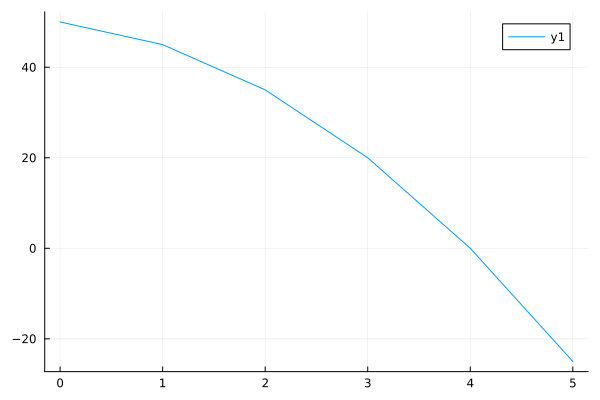

In [2]:
p(a) = 50 -2.5*a -2.5*a^2
plot([i for i=0:5], [p(i) for i=0:5])

In [3]:
# Model definition :

model = (;
    δ = 0.9,
    profit = p,
    cost = 75
)

# Initial guesses :
V_0 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
x_0 = [true, true, true, true, true]        # only 5 choices as when a=5 > x(a) = forced to replace 

model

(δ = 0.9, profit = p, cost = 75)

**Solve the problem using Value Function Iteration**

In [4]:
distance(v1::Vector,v2::Vector) = maximum(abs.(v2-v1))

distance (generic function with 1 method)

In [35]:
function bellman_step(V, m)
    (; δ, profit, cost) = m

    T_V = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    T_x = [true, true, true, true, true]    # osef des valeurs ici

    # forced replacement for a=5
    T_V[6] = profit(5) + δ*(V[1] - cost)

    # MAKE BEST CHOICE (=> update policy rule au passage... pas utile pour VFI)
    for i=0:4
        v_replace = profit(i) + δ*(V[1] - cost) 
        v_keep    = profit(i) + δ*V[i+1+1]
        if v_replace>v_keep
            T_V[i+1] = v_replace
            T_x[i+1] = 1
        else
            T_V[i+1] = v_keep
            T_x[i+1] = 0
        end
    end

    return T_V, T_x
end

# bellman_step(V_0, model)

bellman_step (generic function with 1 method)

In [36]:
function VFI(m; T=500, τ_η = 10^(-10), verbose=false)
    (; δ, profit, cost) = m

    V_0 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

    for t=1:T
        T_V, T_x = bellman_step(V_0, m)
        η = distance(V_0,T_V)
        V_0 = T_V

        if verbose
            println("Iteration $(t): η $(η)")
            println("Iteration $(t): V_U $(V_0)")
            println("---------------")
        end

        if η<τ_η
            return V_0
        end
    end
    error("No convergence")
end


VFI (generic function with 1 method)

In [37]:
VFI(model; T=250, verbose=true)

Iteration 1: η 92.5
Iteration 1: V_U [50.0, 45.0, 35.0, 20.0, 0.0, -92.5]
---------------
Iteration 2: η 45.0
Iteration 2: V_U [90.5, 76.5, 53.0, 20.0, -22.5, -47.5]
---------------
Iteration 3: η 36.45
Iteration 3: V_U [118.85000000000001, 92.7, 53.0, 33.95, 13.950000000000001, -11.049999999999999]
---------------
Iteration 4: η 25.515000000000008
Iteration 4: V_U [133.43, 92.7, 74.465, 59.46500000000001, 39.46500000000001, 14.46500000000001]
---------------
Iteration 5: η 19.3185
Iteration 5: V_U [133.43, 112.0185, 88.51850000000002, 72.58700000000002, 52.58700000000001, 27.58700000000001]
---------------
Iteration 6: η 17.386650000000003
Iteration 6: V_U [150.81665, 124.66665000000002, 100.32830000000001, 72.58700000000002, 52.58700000000001, 27.58700000000001]
---------------
Iteration 7: η 15.647984999999998
Iteration 7: V_U [162.19998500000003, 135.29547000000002, 103.23498500000001, 88.23498500000001, 68.23498500000001, 43.23498500000001]
---------------
Iteration 8: η 11.176501

6-element Vector{Float64}:
 244.9040418719937
 216.560046524524
 190.62227391621855
 172.91363768470939
 152.91363768470939
 127.91363768470939

**Solve the problem using Policy Iteration. Compare with VFI.**

In [38]:
function value_update(x, V, m)
    (; δ, profit, cost) = m

    T_V = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

    # forced replacement for a=5
    T_V[6] = profit(5) + δ*(V[1] - cost)

    # apply decision rule for each state
    for i=0:4
        if x[i+1]
            # decision = replace
            T_V[i+1] = profit(i) + δ*(V[1] - cost) 
        else
            # decision = keep
            T_V[i+1] = profit(i) + δ*V[i+1+1]
        end
    end

    return T_V
end

# value_update(x_0,V_0,model)

value_update (generic function with 1 method)

In [39]:
function policy_eval(x,m; T=500, τ_η = 10^(-10), verbose=false)
    (; δ, profit, cost) = m

    V_0 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

    for t=1:T
        T_V = value_update(x,V_0, m)  
        η = distance(V_0,T_V)
        V_0 = T_V

        if verbose
            println("Iteration $(t): η $(η)")
            println("Iteration $(t): V_U $(V_0)")
            println("---------------")
        end

        if η<τ_η
            return V_0
        end
    end
    error("No convergence")
end     

policy_eval (generic function with 1 method)

In [40]:
policy_eval(x_0,model; T=250, verbose=true)

Iteration 1: η 92.5
Iteration 1: V_U [-17.5, -22.5, -32.5, -47.5, -67.5, -92.5]
---------------
Iteration 2: η 15.75
Iteration 2: V_U [-33.25, -38.25, -48.25, -63.25, -83.25, -108.25]
---------------
Iteration 3: η 14.174999999999997
Iteration 3: V_U [-47.425, -52.425, -62.425, -77.425, -97.425, -122.425]
---------------
Iteration 4: η 12.757500000000007
Iteration 4: V_U [-60.182500000000005, -65.1825, -75.1825, -90.1825, -110.1825, -135.1825]
---------------
Iteration 5: η 11.481750000000005
Iteration 5: V_U [-71.66425000000001, -76.66425000000001, -86.66425000000001, -101.66425000000001, -121.66425000000001, -146.66425]
---------------
Iteration 6: η 10.333574999999996
Iteration 6: V_U [-81.997825, -86.997825, -96.997825, -111.997825, -131.997825, -156.997825]
---------------
Iteration 7: η 9.300217500000002
Iteration 7: V_U [-91.29804250000001, -96.29804250000001, -106.29804250000001, -121.29804250000001, -141.2980425, -166.2980425]
---------------
Iteration 8: η 8.370195749999993
I

6-element Vector{Float64}:
 -174.9999999991272
 -179.9999999991272
 -189.9999999991272
 -204.9999999991272
 -224.9999999991272
 -249.9999999991272

In [47]:
function PFI(m; T=500, τ_η = 10^(-10), verbose=false)
    (; δ, profit, cost) = m

    V_0 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    x_0 = [true, true, true, true, true]

    for t=1:T
        V_0 = policy_eval(x_0,model)
        V_0, x_1 = bellman_step(V_0,model)
        η = distance(x_0,x_1)
        x_0 = x_1
        
        if verbose
            println("Iteration $(t): $(η) | $(x_0)")
        end

        if η<τ_η
            println("Converged at Iteration $(t)")
            return V_0, x_0
        end
    end
end

PFI (generic function with 1 method)

In [48]:
PFI(model, verbose=true)

Iteration 1: 1 | Bool[0, 0, 0, 0, 0]
Iteration 2: 1 | Bool[0, 0, 1, 1, 1]
Iteration 3: 1 | Bool[0, 0, 0, 1, 1]
Iteration 4: 0 | Bool[0, 0, 0, 1, 1]
Converged at Iteration 4


([244.90404187233906, 216.5600465248821, 190.622273916453, 172.91363768503473, 152.91363768503473, 127.91363768503473], Bool[0, 0, 0, 1, 1])